# How Game Stats Determine Team Success in the NBA

Blog Post: https://rondo24.github.io/nba_stats_that_translate_to_team_success

There are numerous game statistics recorded for each NBA game. These stats cover almost every aspect of each game, and can essential tell most of the story on how a game was won. Stats that are captured range from baskets made, baskets attempted, assists, steals, turnovers, rebounds, and many more. Which of these statistics has the most importance in determining who comes out the winner of a game? Do some statistics stand out as more important than other stats? Has the importance of these individual statistics changed over the seasons as the game has evolved? The below analysis is my attempt to answer these questions.

I have obtained the game statistics for every regular season NBA game for the past four seasons (14-15 season, 15-16 season, 16-17 season, and the 17-18 season)

My approach to answering the above questions will be:

1) Determine the features (statistics) to use to best determine the outcome of a game

2) Build multiple classification models with default parameters to best predict the outcome of the game based on the selected features for the combined four NBA seasons worth of data

3) Select one of our default models and determine the best hyper parameters for it

4) Run our selected model with determined hyper parameters on subsets of our data for each season

5) Graph our feature importance for each season and observe the changes throughout each season

The first thing we want to do is import all necessary python libraries for our analysis.

In [1]:
import pandas as pd # to use the dataset in a pandas dataframe setting for editing
import seaborn as sns # to create heatmaps and pairplots
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt #visualization library
%matplotlib inline

from sklearn.preprocessing import StandardScaler # to put all our features on the same scale for modeling
from sklearn.model_selection import train_test_split # splitting our data into a training set and testing set
from sklearn.model_selection import GridSearchCV # used to determine the best hyperfeatures for our models

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score #importing different measures of model effectivness

import xgboost as xgb #XG Boost Model
from sklearn.tree import DecisionTreeClassifier #Decision Tree Model
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier #Bagging and Random Forest Model

import warnings
warnings.filterwarnings('ignore')

Next I imported the data used, provided to us precleaned via Kaggle from this link: https://www.kaggle.com/ionaskel/nba-games-stats-from-2014-to-2018#nba.games.stats.csv

In [2]:
raw_data = pd.read_csv('nba.games.stats.csv')

In [3]:
raw_data.head()

,Unnamed: 0,Team,Game,Date,Home,Opponent,WINorLOSS,TeamPoints,OpponentPoints,FieldGoals,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
0,1,ATL,1,2014-10-29,Away,TOR,L,102,109,40,...,27,33,0.818,16,48,26,13,9,9,22
1,2,ATL,2,2014-11-01,Home,IND,W,102,92,35,...,18,21,0.857,11,44,25,5,5,18,26
2,3,ATL,3,2014-11-05,Away,SAS,L,92,94,38,...,27,38,0.711,11,50,25,7,9,19,15
3,4,ATL,4,2014-11-07,Away,CHO,L,119,122,43,...,20,27,0.741,11,51,31,6,7,19,30
4,5,ATL,5,2014-11-08,Home,NYK,W,103,96,33,...,8,11,0.727,13,44,26,2,6,15,29


In [4]:
raw_data.describe()

,Unnamed: 0,Game,TeamPoints,OpponentPoints,FieldGoals,FieldGoalsAttempted,FieldGoals.,X3PointShots,X3PointShotsAttempted,X3PointShots.,...,Opp.FreeThrows,Opp.FreeThrowsAttempted,Opp.FreeThrows.,Opp.OffRebounds,Opp.TotalRebounds,Opp.Assists,Opp.Steals,Opp.Blocks,Opp.Turnovers,Opp.TotalFouls
count,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,...,9840.00000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000,9840.000000
mean,11960.157012,41.500000,103.652337,103.652337,38.602439,84.902439,0.455689,9.126829,25.623679,0.354321,...,17.32063,22.749390,0.762395,10.287602,43.520630,22.546545,7.750508,4.827642,13.638618,20.058537
std,18654.867508,23.670804,12.188043,12.188043,5.029992,7.130043,0.054711,3.598084,7.102501,0.097782,...,6.00262,7.390451,0.104297,3.807120,6.410428,5.122989,2.958886,2.536845,3.869543,4.317611
min,1.000000,1.000000,64.000000,64.000000,19.000000,60.000000,0.271000,0.000000,4.000000,0.000000,...,1.00000,1.000000,0.143000,0.000000,20.000000,6.000000,0.000000,0.000000,2.000000,7.000000
25%,2537.750000,21.000000,95.000000,95.000000,35.000000,80.000000,0.418000,7.000000,21.000000,0.290000,...,13.00000,18.000000,0.696000,8.000000,39.000000,19.000000,6.000000,3.000000,11.000000,17.000000
50%,5141.500000,41.500000,103.000000,103.000000,38.000000,85.000000,0.455000,9.000000,25.000000,0.353000,...,17.00000,22.000000,0.769000,10.000000,43.000000,22.000000,8.000000,5.000000,13.000000,20.000000
75%,7715.250000,62.000000,112.000000,112.000000,42.000000,89.000000,0.494000,11.000000,30.000000,0.419000,...,21.00000,27.000000,0.833000,13.000000,48.000000,26.000000,10.000000,6.000000,16.000000,23.000000
max,82119.000000,82.000000,149.000000,149.000000,58.000000,129.000000,0.684000,25.000000,61.000000,0.750000,...,44.00000,64.000000,1.000000,38.000000,81.000000,47.000000,21.000000,18.000000,29.000000,42.000000


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 41 columns):
Unnamed: 0                  9840 non-null int64
Team                        9840 non-null object
Game                        9840 non-null int64
Date                        9840 non-null object
Home                        9840 non-null object
Opponent                    9840 non-null object
WINorLOSS                   9840 non-null object
TeamPoints                  9840 non-null int64
OpponentPoints              9840 non-null int64
FieldGoals                  9840 non-null int64
FieldGoalsAttempted         9840 non-null int64
FieldGoals.                 9840 non-null float64
X3PointShots                9840 non-null int64
X3PointShotsAttempted       9840 non-null int64
X3PointShots.               9840 non-null float64
FreeThrows                  9840 non-null int64
FreeThrowsAttempted         9840 non-null int64
FreeThrows.                 9840 non-null float64
OffRebounds       

By looking at the central tendency measures of our raw data, as well as the info, I was able to determine the following:

1) I confirmed that the data shows regular season games only, and not playoffs (max number in the "Game" column is 82, and there is 82 games in a regular season)

2) Each game is represented twice in the data set, one row for each team for each game

3) The data is cleaned and doesn't contain any missing or replacement values

4) Our label variable is the "WINorLOSS" column

The following code was used to remove the unnecessary rows (the copy of each game) and columns that we will not need for this analysis.


In [6]:
df = raw_data #created a new dataframe, to keep our raw data untouched
df['Date'] = pd.to_datetime(df['Date']) #converting our date to a datetime datatype, in case we plan to use time analysis
df = df[df.Home != 'Away'] #this code removes all the rows that provides the data for teams that are playing an away game, since all the information is already provided
df.drop('Unnamed: 0', axis=1, inplace=True) #no useful information in this row
df.drop('Home', axis=1 , inplace=True) #since we dropped the 'Aways', this is an unecessary column now
df.drop(df.columns[23:], axis = 1, inplace=True) #these columns provided the opponent's game stats. our analysis is revolving around each home team's performance
df['WINorLOSS'] = df['WINorLOSS'].map({'W': 1, 'L': 0}) #mapping our label to be a win = 1 and a loss = 0.

Before we starting evaluating our data for the analysis, I want to develop a baseline score for us to compare our models to. By creating models that provide a higher accuracy score than our baseline. We know that our model is better than just guessing the home team will win every game.

**Why am i using accuracy over other metrics!!**

In [7]:
#code will give us the accuracy score we could achieve if we picked every home team to win
n_games = df.WINorLOSS.count()
n_homewins = df.WINorLOSS[df['WINorLOSS'] == 1].count()
win_percentage = n_homewins/n_games
print("Home Win Percentage: {0:.1f}%".format(100*win_percentage))

Home Win Percentage: 58.2%


Based on the above, we have determined that if we just picked the home team to win every game, that we would be correct about 58% of the time. This is our baseline accuracy score that we will be comparing our model's accuracy scores to, to see improvements.

Based on the data provided, there were a few features I wanted to create before I evaluated them to be used in our modeling, to make sure I was covering all aspects of the game. I am able to develop these new features based on the data already provided in our dataset.

In [8]:
df['X2PointShots'] = df['FieldGoals'] - df['X3PointShots'] #creates a feature for 2 point baskets made
df['X2PointShotsAttempted'] = df['FieldGoalsAttempted'] - df['X3PointShotsAttempted'] #creates a feature for 2 point baskets attempted
df['X2PointShots.'] = df['X2PointShots'] / df['X2PointShotsAttempted'] #creates a feature for 2 point basket percentage
df['DefRebounds'] = df['TotalRebounds'] - df['OffRebounds'] #creates a feature for defensive rebounds


Now that I have all the features I want to potentially use, I decided to create a correlation heat map to evaluate the features to determine which would be best to use. The heatmap below will help me answer the following questions:

1) Which features help determine team points (a good starting point to determining if a team is going to win is if there is high positive correlation)

2) Which features have collinearity and should be removed

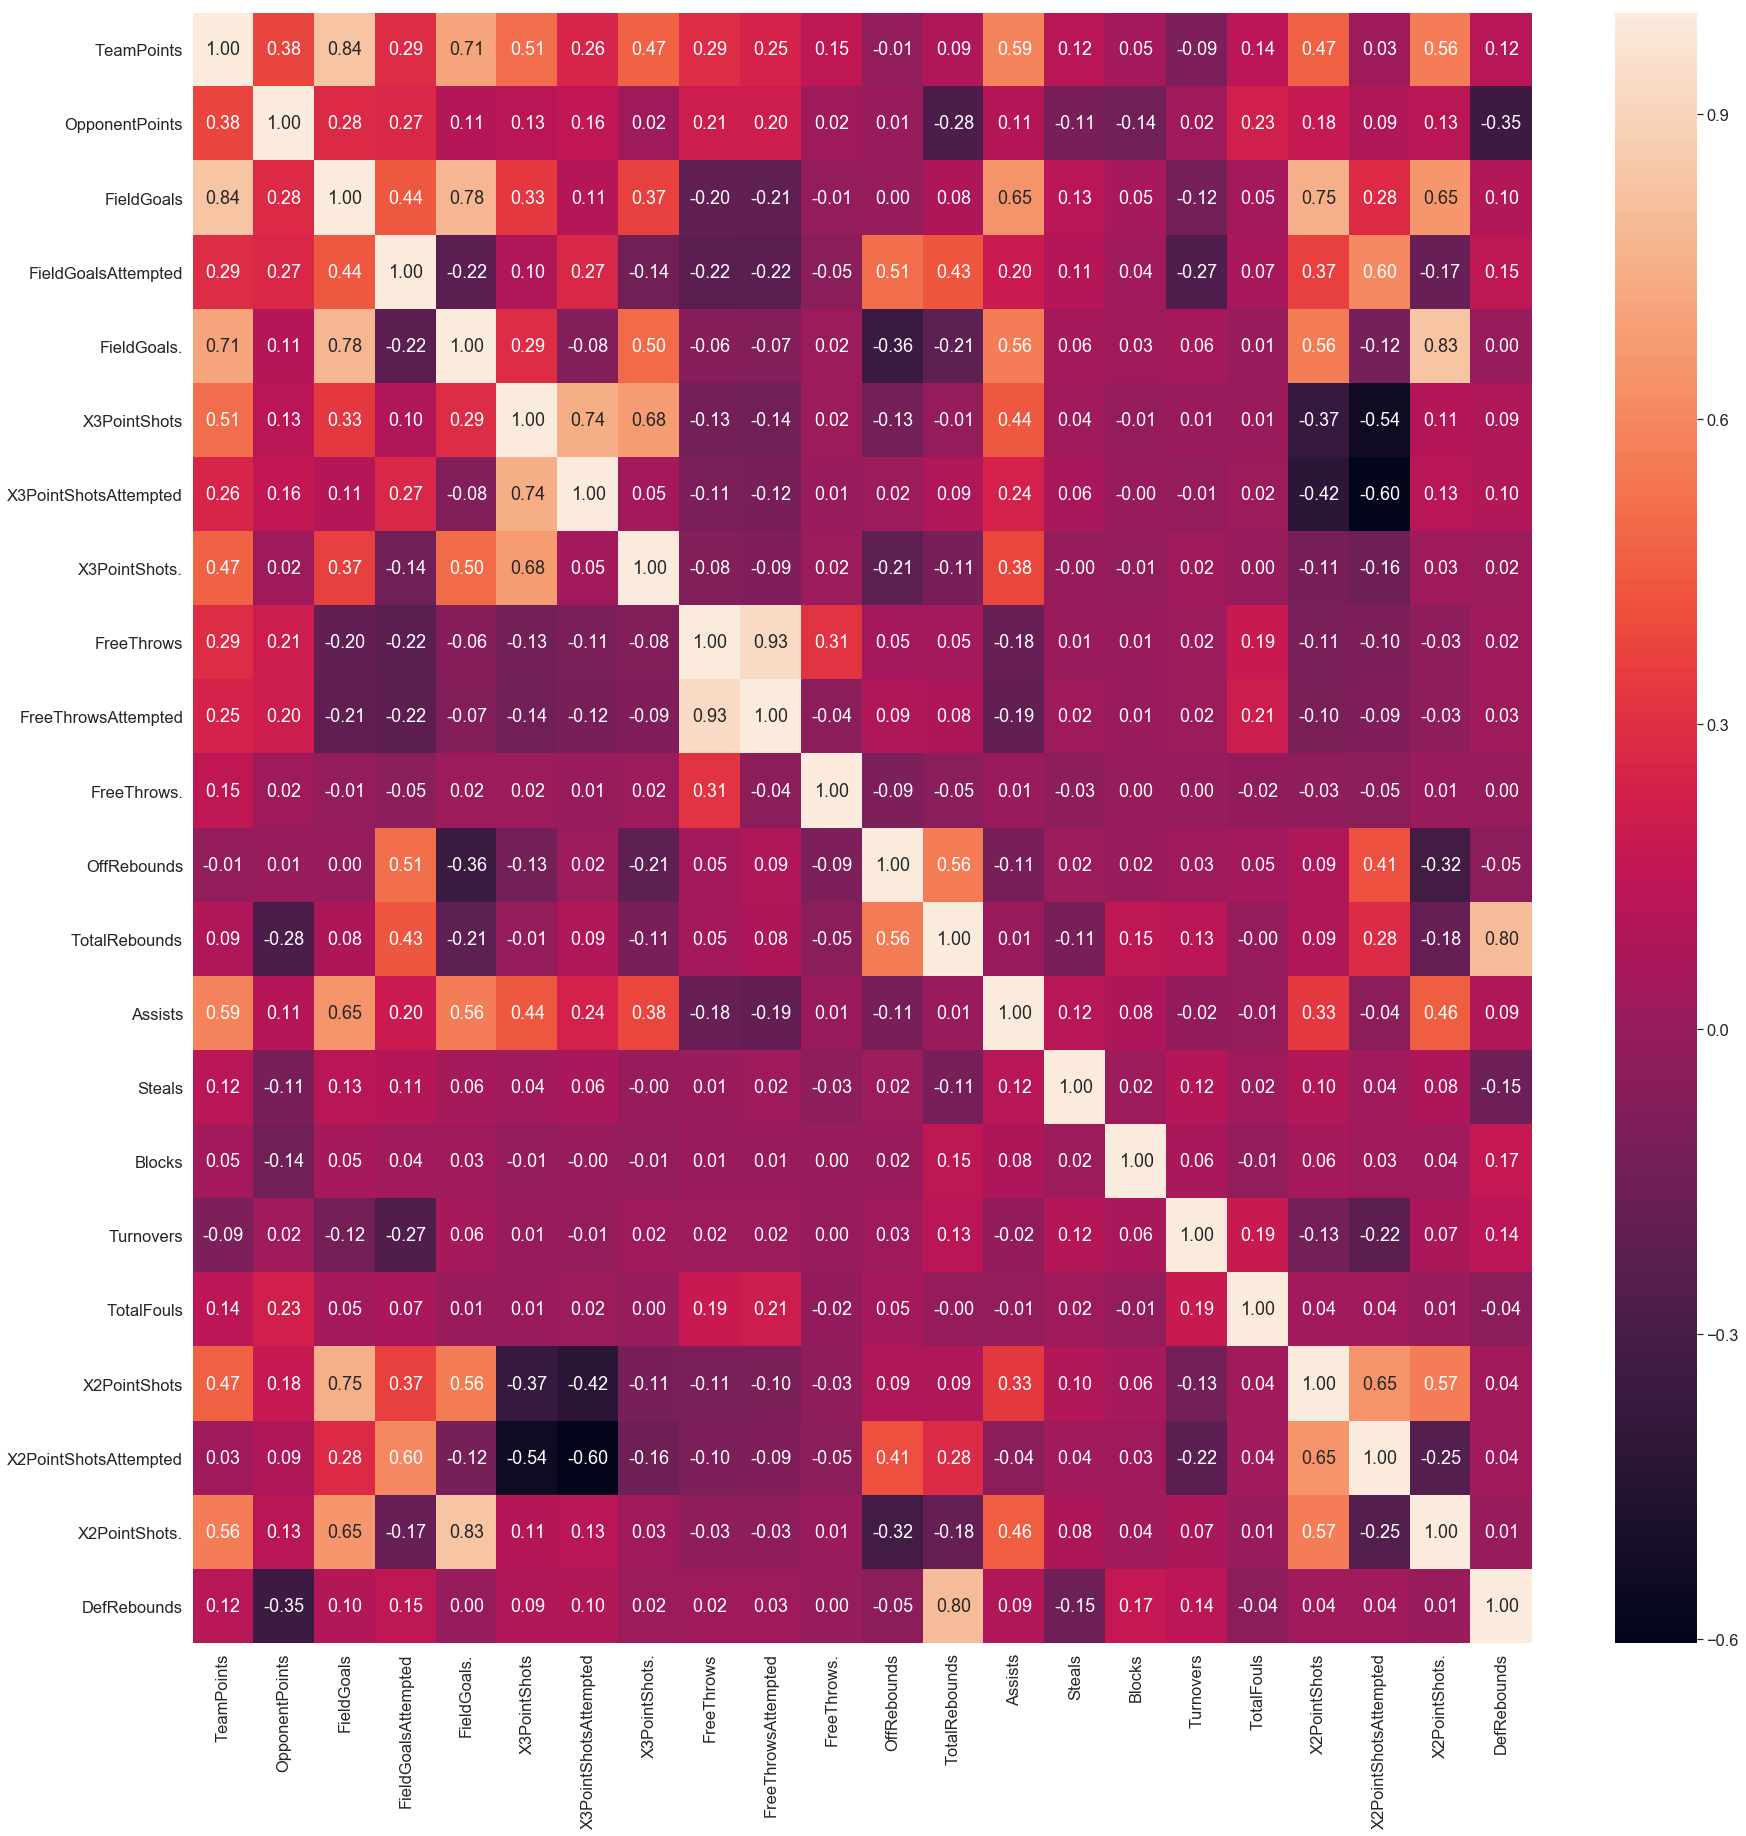

In [9]:
feat = df.drop(['Team', 'Game', 'Opponent', 'WINorLOSS', 'Date'], axis=1) #drops our non features
label = df.WINorLOSS #setting up our label data
sns.set(font_scale=1.5)
plt.figure(figsize=(30,30))
sns.heatmap(feat.corr(), annot=True, fmt='.2f') #creates our heatmap to look at correlation between features

Based on our correlation heat map above, I have determined the inital features that we will explore for this analysis will be the following:

1) 2 Point Shooting Percentage

2) 3 Point Shooting Percentage

3) Free Throw Percentage

4) Offensive Rebounds

5) Defensive Rebounds

6) Assists

7) Steals

8) Turnovers

9) Blocks

10) Total Fouls

In [10]:
#removing the features we will not be needing

feat_to_use = feat.drop(['TeamPoints', 'OpponentPoints', 'FieldGoals', 'FieldGoalsAttempted',
       'FieldGoals.', 'X3PointShots', 'X3PointShotsAttempted', 'FreeThrows', 'FreeThrowsAttempted',
       'TotalRebounds', 'X2PointShots', 'X2PointShotsAttempted'], axis=1)

The above code finalizes our features into one dataframe. We will also need to scale our features to put them all on the same basis. This makes sure that none of the features out weigh other features based on their raw values. I will then split the scaled features and labels into a training set and testing set for our models

In [11]:
#scaling our determined features to be used for modeling

scaler = StandardScaler()
scaled_feat = scaler.fit_transform(feat_to_use)

#splitting our features and labels into training and testing groups
X_train, X_test, y_train, y_test = train_test_split(scaled_feat,label)

For different classification models to try, I decided to try out a Bagging Classifier Model, the Random Forest Ensemble Classifier Model, and a Decision Tree Classifier Model.

In [12]:
#bagging classifier
bagged_tree = BaggingClassifier()
bagged_tree.fit(X_train,y_train)
tr_acc = bagged_tree.score(X_train, y_train)
val_acc = bagged_tree.score(X_test, y_test)
print("Validation Accuracy: {:.4}%".format(val_acc *100))

Validation Accuracy: 76.34%


In [13]:
#random forest classifier
forest = RandomForestClassifier()
forest.fit(X_train,y_train)
tr_acc = forest.score(X_train,y_train)
val_acc = forest.score(X_test, y_test)
print("Validation Accuracy: {:.4}%".format(val_acc *100))

Validation Accuracy: 76.1%


In [14]:
#decision tree classifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train,y_train)
train_pred = tree_clf.predict(X_train)
val_pred = tree_clf.predict(X_test)
training_acc = accuracy_score(y_train, train_pred)
val_acc = accuracy_score(y_test, val_pred)
print("Validation Accuracy: {:.4}%".format(val_acc *100))


Validation Accuracy: 68.7%


Each of our models ended up predicting the outcome of basketball games better than our baseline of 58%!. I determined that I wanted to move forward and explore more into our decision tree model, currently sitting at about 68%. I chose this model, because this model, to me, will be easier to use to explain what is happening under the hood for feature importance, and to whom I will be eventually presenting the results to. I decided to look at our default Decision trees features by their importance below:

In [15]:
#these lines of code create a bar graph showing the importance of each feature in our model
def plot_feature_importances(model, title):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), feat_to_use.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.title(title)

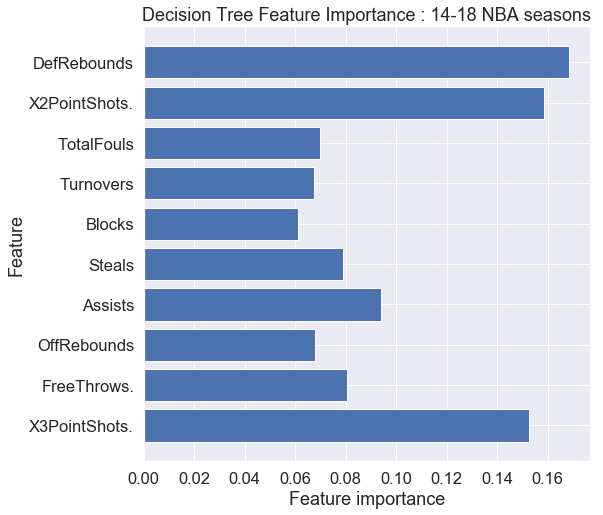

In [16]:
plot_feature_importances(tree_clf, 'Decision Tree Feature Importance : 14-18 NBA seasons')

As we can see, our initial model is showing that defensive rebounds is the most important feature, followed by 2 point shooting percentage, and then 3 point shooting percentage. Before making any conclusions, lets testing multiple hyper parameters for our decision tree to see if we can improve on our model.

In [17]:
param_grid = {"max_depth": [2, 4, 6, 8, 10, 12], #these are all the parameters that we will test out. Our GridSearchCV will try every combination to determine which combination of parameters makes the best model.
              'criterion': ['gini', 'entropy'], 
              'max_features': [1,2,3,4,5,6,7,8,9,10]
             
             }

grid_tree_clf = GridSearchCV(tree_clf, param_grid, cv=3, n_jobs=1, scoring='accuracy') #code to test each parameter combination, with a 3 cross fold validation step.
grid_tree_clf.fit(X_train, y_train)

#reruning our decision tree with all features

best_parameters = grid_tree_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

train_pred = grid_tree_clf.predict(X_train)
val_pred = grid_tree_clf.predict(X_test)
training_acc = accuracy_score(y_train, train_pred)
val_acc = accuracy_score(y_test, val_pred)

print("")

print("Validation accuracy: {:.4}%".format(val_acc * 100))

Grid Search found the following optimal parameters: 
criterion: 'entropy'
max_depth: 10
max_features: 6

Validation accuracy: 71.79%


Confusion matrix, without normalization
[[336 169]
 [178 547]]
Normalized confusion matrix
[[0.67 0.33]
 [0.25 0.75]]


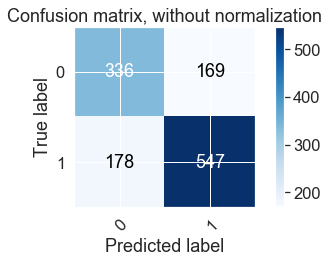

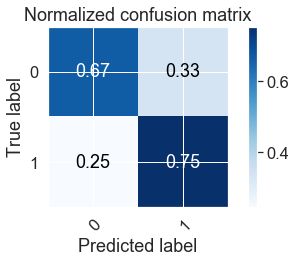

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, val_pred,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, val_pred, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

As we can see, by determine the best hyper parameters for our model, we increased its accuracy by about 4%! Below is the feature importance graph for the updated model

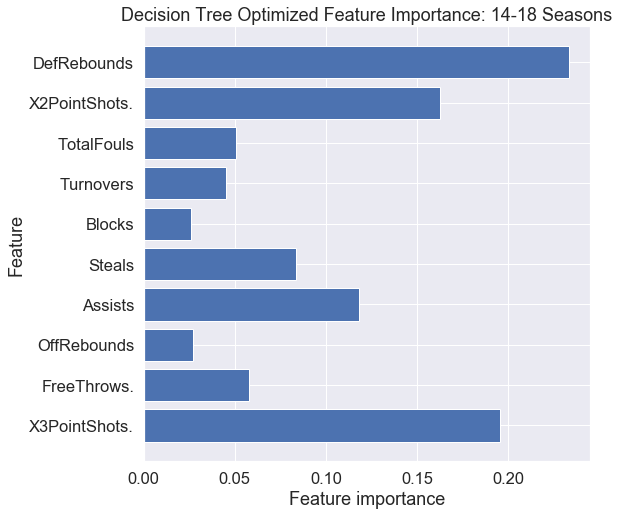

In [18]:
tree_clf2 = DecisionTreeClassifier(max_depth = 8, max_features = 5, criterion = 'entropy')
tree_clf2.fit(X_train,y_train)
plot_feature_importances(tree_clf2, 'Decision Tree Optimized Feature Importance: 14-18 Seasons')

My initial conclusions from the above:

1) How well a team can shoot the ball is a good indicator of team success

2) How well a team can either stop their opponent from scoring, or limiting their chances to score to one per possession is another great indicator of team success

3) Defense shows more importance than offense in determining the outcome of games

The below code now runs the same decision tree model process for each NBA season, in order for us to compare how important these features change each season in determining the outcome of basketball games.

In [19]:
#creating separate dataframes for each season
df_14_15 = df[(df['Date'] >= '2014-10-28') & (df['Date'] <= '2015-04-15')]
df_15_16 = df[(df['Date'] >= '2015-10-27') & (df['Date'] <= '2016-04-13')]
df_16_17 = df[(df['Date'] >= '2016-10-25') & (df['Date'] <= '2017-04-12')]
df_17_18 = df[(df['Date'] >= '2017-10-17') & (df['Date'] <= '2018-04-11')]

In [20]:
#label data for each season
label_14_15 = df_14_15.WINorLOSS
label_15_16 = df_15_16.WINorLOSS
label_16_17 = df_16_17.WINorLOSS
label_17_18 = df_17_18.WINorLOSS

#features for each season
feat_to_use_14_15 = df_14_15.drop(['Team', 'Game', 'Opponent', 'WINorLOSS', 'Date','TeamPoints', 'OpponentPoints', 'FieldGoals', 'FieldGoalsAttempted',
       'FieldGoals.', 'X3PointShots', 'X3PointShotsAttempted', 'FreeThrows', 'FreeThrowsAttempted',
       'TotalRebounds', 'X2PointShots', 'X2PointShotsAttempted'], axis=1)
feat_to_use_15_16 = df_15_16.drop(['Team', 'Game', 'Opponent', 'WINorLOSS', 'Date','TeamPoints', 'OpponentPoints', 'FieldGoals', 'FieldGoalsAttempted',
       'FieldGoals.', 'X3PointShots', 'X3PointShotsAttempted', 'FreeThrows', 'FreeThrowsAttempted',
       'TotalRebounds', 'X2PointShots', 'X2PointShotsAttempted'], axis=1)
feat_to_use_16_17 = df_16_17.drop(['Team', 'Game', 'Opponent', 'WINorLOSS', 'Date','TeamPoints', 'OpponentPoints', 'FieldGoals', 'FieldGoalsAttempted',
       'FieldGoals.', 'X3PointShots', 'X3PointShotsAttempted', 'FreeThrows', 'FreeThrowsAttempted',
       'TotalRebounds', 'X2PointShots', 'X2PointShotsAttempted'], axis=1)
feat_to_use_17_18 = df_17_18.drop(['Team', 'Game', 'Opponent', 'WINorLOSS', 'Date','TeamPoints', 'OpponentPoints', 'FieldGoals', 'FieldGoalsAttempted',
       'FieldGoals.', 'X3PointShots', 'X3PointShotsAttempted', 'FreeThrows', 'FreeThrowsAttempted',
       'TotalRebounds', 'X2PointShots', 'X2PointShotsAttempted'], axis=1)

#scaling the features
scaled_feat_14_15 = scaler.fit_transform(feat_to_use_14_15)
scaled_feat_15_16 = scaler.fit_transform(feat_to_use_15_16)
scaled_feat_16_17 = scaler.fit_transform(feat_to_use_16_17)
scaled_feat_17_18 = scaler.fit_transform(feat_to_use_17_18)

#splitting the data into training and testing data
X_train1, X_test1, y_train1, y_test1 = train_test_split(scaled_feat_14_15,label_14_15)
X_train2, X_test2, y_train2, y_test2 = train_test_split(scaled_feat_15_16,label_15_16)
X_train3, X_test3, y_train3, y_test3 = train_test_split(scaled_feat_16_17,label_16_17)
X_train4, X_test4, y_train4, y_test4 = train_test_split(scaled_feat_17_18,label_17_18)

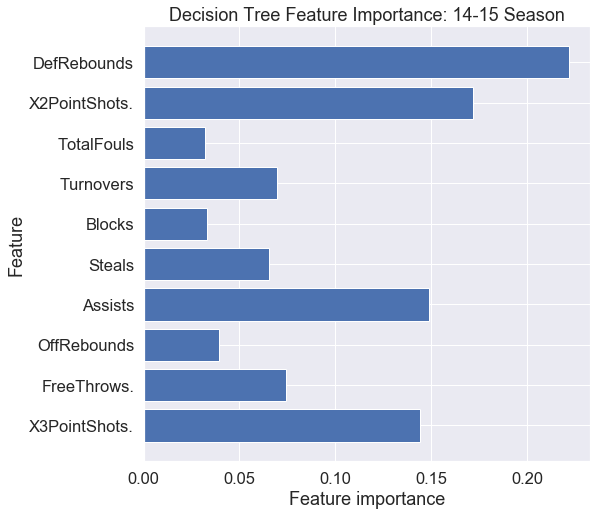

In [25]:
tree_clf_14_15 = DecisionTreeClassifier(max_depth = 8, max_features = 5, criterion = 'entropy')
tree_clf_14_15.fit(X_train,y_train)
plot_feature_importances(tree_clf_14_15, 'Decision Tree Feature Importance: 14-15 Season')

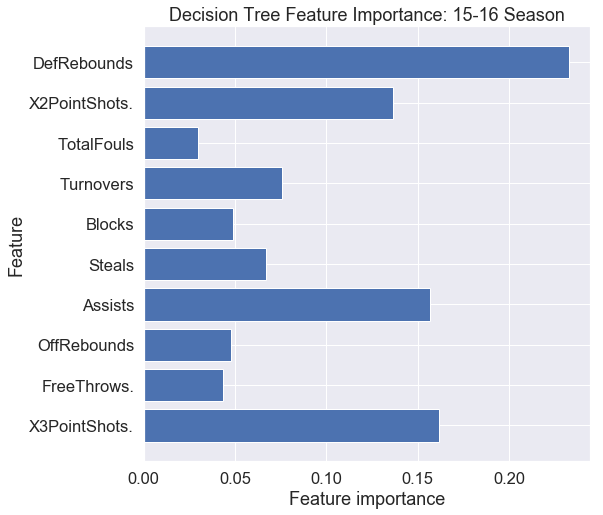

In [22]:
tree_clf_15_16 = DecisionTreeClassifier(max_depth = 8, max_features = 5, criterion = 'entropy')
tree_clf_15_16.fit(X_train,y_train)
plot_feature_importances(tree_clf_15_16, 'Decision Tree Feature Importance: 15-16 Season')

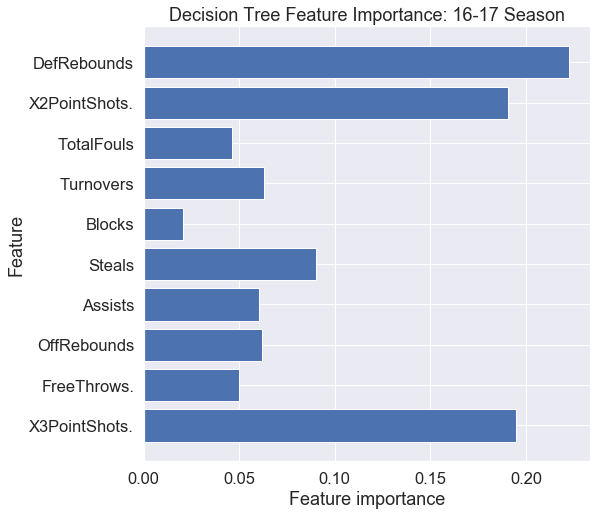

In [23]:
tree_clf_16_17 = DecisionTreeClassifier(max_depth = 8, max_features = 5, criterion = 'entropy')
tree_clf_16_17.fit(X_train,y_train)
plot_feature_importances(tree_clf_16_17, 'Decision Tree Feature Importance: 16-17 Season')

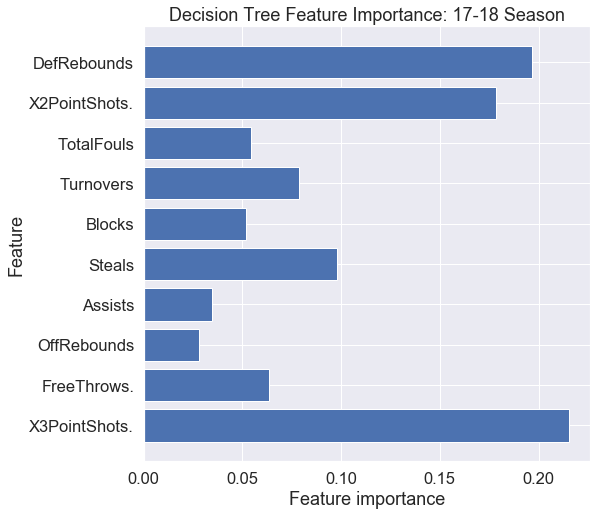

In [33]:
tree_clf_17_18 = DecisionTreeClassifier(max_depth = 8, max_features = 5, criterion = 'entropy')
tree_clf_17_18.fit(X_train,y_train)
plot_feature_importances(tree_clf_17_18, 'Decision Tree Feature Importance: 17-18 Season')

# Conclusion/Recommendation
Based on the above analysis, I have determined the following key conclusions and recommendations:

**1) Defense is the most important factor in determining the outcome of games**

**Insight for the team**: By limiting your opponent's chances to scoring per possession to one, you are greatly increasing your odds of winning the game. Develop team strategies to increase efficiency of boxing out for rebounds.

**2) How well a team can shoot the ball is the next important factor, and the three point shot is becoming more important:**

**Insight for the team**: The team needs to start focussing on offensive strategies to get players open for three point shots, as well as signing players or trading for players that show high percentages in three point shooting, as they are becoming more valuable as seasons progress.
    
**3) Fouls and blocks are not important features in determining the outcome of a game**

**Insight for the team**: On the defensive end of the ball, it is more efficient as a team to not go for block shots by swatting at the ball, but by playing face to face, straight hands up defense, especially when defending the opposing player taking the shot. Work with the players to develop the habit of not swatting the ball when the shot goes up on the defensive side of the game.

# Follow Ups
Given more time to go through this analysis, there are a few other approaches I would have liked to explore:

1) Does time between games have a great impact on whether a team wins their next game?

2) Do specific team lineups provide impact to the outcome of a game?

3) Do specific players provide impact to the outcome of a game?